# Data

Understanding and working with data is an essential skill of statistics and data science (SDS).
Data is involved in most every conversation, and in every stage, of an analysis or scientific method.
When a hypothesis is posed, we need to think about the data needed to support or refute our hypothesis. 
We collect data to explore and better understand biological phenomena, and how different biological components work together. 

Our goals for this class will be to learn about:

* Observations, variables, and a data matrix
* Data Collection and Sampling
* Experiments vs Observational studies
* Exploring and summarizing data
* Exploratory data analysis

##  Observations, variables and the data matrix (data frame)

An **observation** is a set of measurements or values derived from an object under study. 
Individual characteristics of an observation are called **variables**, and observations with their associated variables are typically organized into a **data matrix**---often called a **data frame**.

For example, suppose we are asked to help study characteristics of patients that lead to heart failure.
Our research groups collects $13$ different traits on $299$ patients with heart failure. 
Our observations are patients with heart failure.
Patients have $13$ different variables measured. 
And we can organize this data into a data frame

In [4]:
import pandas as pd # Pandas is a python module used to manipualte data.
heartfailuredata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv") # read in a data file in CSV format.

heartfailuredata.head(10) # print the first 10 rows in the data matrix (data frame)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In the above, each row represents a patient with heart failure (an observation), and each column stores a different variable (age, whether they are anaemic, the patient's creatine levels, etc.).
As a statistician, you will often not receive data in such a nice format as above.
It is the statistician's job to format data so that it can be clearly communicated to others. 

# Data Collection and sampling

When a scientist (like yourself) formulates a hypothesis---a question or statement that can be tested, measured, or otherwise supported or denied---they define a population. 
A **population** is the collection of all possible observations used to address a hypothesis.
It is normally impossible to study an entire population. 
Instead, statisticians and data scientists study a **sample**---a subset of the observations that make up the entire population---from the population. 

In the above data frame of $299$ heart failure patients, the population would be every single patient who has heart failure. 
This is, unfortunately, a massive set of people.
The $299$ heart failures we collected represents a sample from the population of all heart failure patients.

As another example, lets consider the following research question:

_During Flu season, in what epidemic week is the proportion of influenza-like illness likely to peak in the United States?_ 

We will collect data from the Centers for Disease Control (CDC) on proportions of influenza-like illness (ILI) over past seasons in the US from the 2010/2011 season up to the 2019/2020 season. 

Text(436    2562
Name: modelweek, dtype: int64, 436    5.03689
Name: wili, dtype: float64, 'Peak ILI')

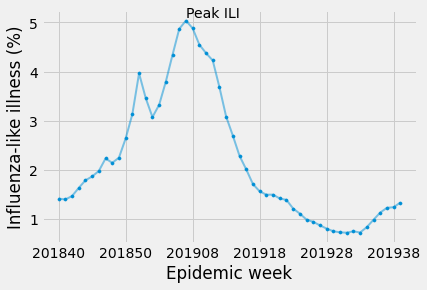

In [21]:
# download data from dr.m's github repo (how convienant)
sampleIliData = pd.read_csv("https://raw.githubusercontent.com/mcandrewlab/cdcilidata/master/ilidata_cdc_us.csv")

season1819 = sampleIliData[sampleIliData.season=='2018/2019'] # pick a single season

# quick look at a single flu season
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot( season1819.modelweek,season1819.wili, lw=2,alpha=0.5 )
ax.scatter( season1819.modelweek,season1819.wili,s=10 )

ax.set_xlabel("Epidemic week")
ax.set_ylabel("Influenza-like illness (%)")

ax.set_xticks(season1819.modelweek[::10])
ax.set_xticklabels(season1819.epiweek[::10])

peak = season1819.sort_values("wili").iloc[-1:]
ax.text( x = peak.modelweek, y = peak.wili, s="Peak ILI", ha="left", va="bottom" )

In the 2018/2019 infleunza season, influenza-like illness (ILI) peaked during the 8th week of 2019---19 weeks from the start of the season. 

Our unit of observation is a single influenza season, defined as values of ILI from the week 40 of one year until the 20th week of the next year. 
We can define two variables: the epidemic week where ILI is highest and the number of weeks from the beginning of the season where ILI peaks.
And we can build a data matrix (data frame) where rows are observations (influenza seasons) and columns are the epidemic week (ew) and number of weeks from the beginning of the season (from40) where ILI peaks.

In [23]:
seasonPeaks = pd.read_csv("https://raw.githubusercontent.com/mcandrewlab/cdcilidata/master/seasonpeaks.csv")
print(seasonPeaks)

      season      ew  from40
0  2010/2011  201105      17
1  2011/2012  201211      23
2  2012/2013  201252      12
3  2013/2014  201352      12
4  2014/2015  201452      12
5  2015/2016  201610      22
6  2016/2017  201706      18
7  2017/2018  201805      17
8  2018/2019  201907      19
9  2019/2020  201952      12


 The influenza seasons from 2010 - 2020 are a subset of all influenza seasons that have occurred in the US.
 They are a **sample** from the **population** of all US influenza seasons. 

## Sampling strategies

When we take a sample from a population, we want to ensure the sample is **representative** and has as little **bias** as possible.
A sample is **representative** when the sample reflects the characteristics of the larger population you wish to study.
A representative sample allows you to generalize findings from your sample to your population.

There are many ways in which a sample can be un-representative of the population under study. 
One way is when a population is samples so that some observations are more likely to be chosen than others. 
This is called **sampling bias**.

For example, suppose you want to study the life expectancy of men and woman in the US. 
To collect a sample, you post on ad on Reddit that asks participants to reply to this post with their date of birth, sex, and GPS coordinates of their place of residence.

Will this sample be biased? If yes, in what ways?

What type of common bias is called **response-bias**. 
Response bias occurs when some members of a population are more probable to respond and be included in the sample than others. 
For example, in our above sampling scheme, only those people who have a Reddit account could respond to our survey.   
Are those who have Reddit accounts representative of all men and women in the US? Likely not. 

There are methods for drawing sample from a population of interest that tries to control for bias.
The goal of any sampling strategy is to collect a sample that best represents the population. 

Lets define a population as a **set**---or collection of items---and assign it the variable $P$.
We can take a sample $S$ from our population 
\begin{align}
    P=\{p_{0},p_{1},p_{2},p_{3},p_{4},\cdots,p_{N-1} \}
\end{align}
and define a sample as a subset, or smaller collection of items, from $P$.
That is, 
\begin{align}
S = \{s_{0},s_{1},s_{2},\cdots,s_{M}\}
\end{align}
where each item in $S$ is picked from our population $P$ and the number of observations in $S$ is smaller than the number of observations in $P$

### Simple random sampling

A simple random sample (SRS) chooses each observation from the population ($P$) with equal probability to build a sample ($S$).
When you sample there is no consideration for any variables measured in the population.
Suppose we could see our entire population $P$, and further, we could measure a single variable that takes two different values: 0 or 1. (see figure)

Text(0.5, 1.0, 'Population')

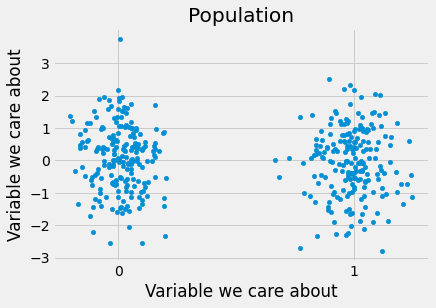

In [89]:
x0 = np.random.normal(0,0.1,200)
_0 = np.random.normal(0,1,200)
pop0 = pd.DataFrame({'Variable we measured':x0, 'Variable we care about':_0})
pop0["f"]=0

x1 = np.random.normal(1,0.1,200)
_1 = np.random.normal(0,1,200)
pop1 = pd.DataFrame({'Variable we measured':x1, 'Variable we care about':_1})
pop1["f"]=1

population = pop0.append(pop1)

fig,ax = plt.subplots()
ax.scatter(x=population["Variable we measured"],y=population["Variable we care about"],s=20)
ax.set(xlabel="Variable we care about",ylabel="Variable we care about")

ax.set_xticks([0,1])
ax.set_yticks(np.arange(-3,3+1))
ax.set_title("Population")

The population above has in total 400 observations (400 dots).
We are interested in sampling this population to study a single variable we care about.

Text(0.5, 1.0, 'Simple random sample')

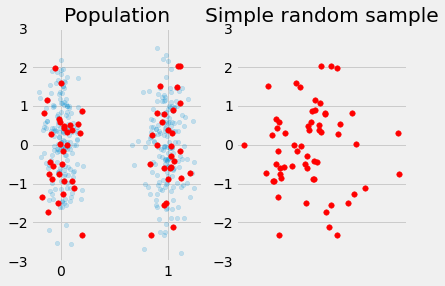

In [103]:
srs = population.sample(60)

fig,axs = plt.subplots(1,2)

ax = axs[0]
ax.scatter(x=population["Variable we measured"],y=population["Variable we care about"],s=20,alpha=0.20)
ax.scatter(x=srs["Variable we measured"],y=srs["Variable we care about"],s=30,color="red")

ax.set(xlabel="",ylabel="")

ax.set_xticks([0,1])
ax.set_yticks(np.arange(-3,3+1))
ax.set_ylim(-3,3)

ax.set_title("Population")

ax=axs[1]
srs["v"]=np.random.normal(0,1,60)
ax.scatter(x=srs["v"],y=srs["Variable we care about"],s=30,color="red")

ax.set_xticks([])
ax.set_yticks(np.arange(-3,3+1))
ax.set_ylim(-3,3)

ax.set_title("Simple random sample")

We will take a simple random sample $(S)$ of 60 observations (red dots) from the total population (blue dots).
It appears that, for values of the variable we care about, the red dots are representative of the entire population. 
Conclusions we draw from our sample will likely generalize to the entire population.

But a simple random sample is not always representative of a population.
What if observations behaved differently dependent on if they are classified into one of two groups, and further we are not aware of the variable we care about differs by this classification.

Text(0.5, 1.0, 'Simple random sample')

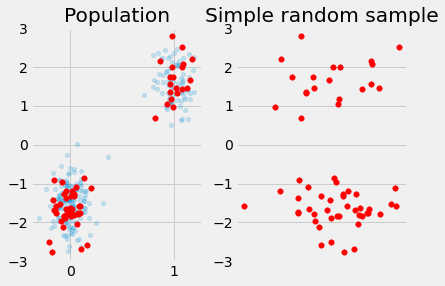

In [118]:
x0 = np.random.normal(0,0.1,200)
_0 = np.random.normal(-1.5,0.5,200)
pop0 = pd.DataFrame({'Variable we measured':x0, 'Variable we care about':_0})
pop0["f"]=0

x1 = np.random.normal(1,0.1,100)
_1 = np.random.normal(1.5,0.5,100)
pop1 = pd.DataFrame({'Variable we measured':x1, 'Variable we care about':_1})
pop1["f"]=1

population = pop0.append(pop1)


srs = population.sample(60)

fig,axs = plt.subplots(1,2)

ax = axs[0]
ax.scatter(x=population["Variable we measured"],y=population["Variable we care about"],s=20,alpha=0.20)
ax.scatter(x=srs["Variable we measured"],y=srs["Variable we care about"],s=30,color="red")

ax.set(xlabel="",ylabel="")

ax.set_xticks([0,1])
ax.set_yticks(np.arange(-3,3+1))
ax.set_ylim(-3,3)

ax.set_title("Population")

ax=axs[1]
srs["v"]=np.random.normal(0,1,60)
ax.scatter(x=srs["v"],y=srs["Variable we care about"],s=30,color="red")

ax.set_xticks([])
ax.set_yticks(np.arange(-3,3+1))
ax.set_ylim(-3,3)

ax.set_title("Simple random sample")

A simple random sample here does look representative.
But a **stratified sample** may be more appropriate. 
A stratified random sample (STRS) draws observations from the population based on which strata (group) they fall into. 
A STRS is appropriate when:
 - The population has groups of data that may be interesting in their own right. For example, a sample of heart failure patients stratified by diabetic and non-diabetic status.
 - It may be convenient to sample by strata. For example, to collect data on influenza-like illness (ILI), a group of hospitals records the number of patients who enter the hospital and the number who are positive for ILI. The strata here are hospitals and it is more convenient to ask them to collect data than having the CDC hire additional people to collect this data. 
 
A **convenience sample** is a (typically) non-probabilistic sampling strategy where the scientists collects observations from their sample that are easies to collect. 
Many times a convenience sample is biased---one where the probability of sampling observations is not uniform in the population, and is also often not representative of the population. 

## Experimental versus Observational data 

Two main ways we can classify data are whether they are experimental or observational.
If data is purposely influenced by the scientific team, the data is **experimental**.
If instead the data is collected without interference from the scientific team, the data is **observational data**. 

For example, a clinical trial enrolls patients with heart failure. 
Patient are screened, and if included in the trial, they are assigned to two groups: (i) patients in the device group receive a transapical valve replacement and (ii) patients in the control group are given state of the art medical management. This is a simplified description of the [PARTNER trial](https://www.nejm.org/doi/full/10.1056/NEJMoa1008232).

An example of an observational dataset is the [Framingham Heart study (FHS)](https://www.google.com/search?q=framhimnbgham+heart+sttudy&oq=framhimnbgham+heart+sttudy&aqs=chrome..69i57j33l3.4143j1j7&sourceid=chrome&ie=UTF-8).
The FHS, started in 1948, followed over 5,000 men and women to identify characteristics that contribute to heart disease. 
Because researchers did not influence the participants, instead following them and recording observations, this study is considered observational. 

### Experimental data

Experiments, and so experimental data, have several advantages over observational data when they are feasible. 
Experimental data can select the observations that most represent the population of interest---called **control**.

Experimental designs can also **randomize**---or choose with a given probability one of many conditions to give to participants---to control for factors the experiment is unable to measure. 
Randomization is a cornerstone of experimental designs.
By randomizing participants to different groups (sometimes called treatments) you can reduce the chances observed differences between groups is due to systematic characteristics of your sampled observations, called **allocation bias**. 

For example, suppose we ran two studies and measured the difference in the proportion of myocardial infarction (MI) between a control and treatment group. 
In the first study we let patients choose whether they are included in the control or treatment groups.
In the second study, each patient is assigned treatment or control at random with probability $1/2$. 
When we measure the difference in proportion of MI, it will be difficult to determine in the first study if the observed difference is because of the treatment or because of some other characteristic of patients who chose the treatment or control group. 
By randomly assigning patients to treatment or control, the second study reduces the chances the difference in the proportion of MI is due to unmeasured properties of the participants, increasing the chances the observed difference is due to the treatment. 

### Observational data

Observational studies record information on samples from a population.
Observational studies can be either **retrospective** or **prospective**.
A **retrospective** study collects past data on samples that fit the population under study.
A **prospective** study identifies samples that fit the population and then records data on these samples at future time points.

Researchers who conduct an observational study should be aware of **selection bias**. 
**Selection bias** occurs when the researcher chooses samples that do not properly represent the population and the outcome of interest, changing the outcome of the study in one direction or the other.
For example, suppose we decide to study the nutritional value of foods purchased in homes to average life expectancy of the residents.
We sample 60 different homes and record the results.
If we do not record any additional information on the homes it may have been the case homes were selected that are in different socioeconomic classes, in locations with different environmental factors known to impact health, or made up of members born in different eras, and so had different views on health. 

Below is [data](https://apps.who.int/gho/data/node.imr.WHOSIS_000001?lang=en) collected by the [World Health Organization](https://www.who.int/) (WHO) on the life expectancy of US men and women, and stored in their **Global Health Observatory (GHO)**.
Researchers at the WHO have collected data from government birth and death certificates, health systems, surveys, and research organizations and made this data available to the public.
Because the WHO has simply observed this data and has not influenced samples included in the data, the GHO is observational data. 

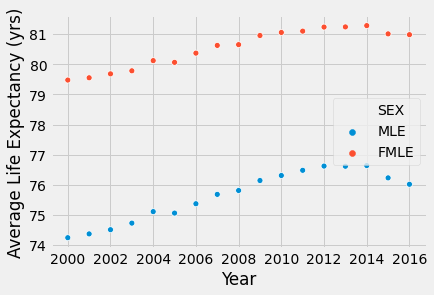

In [119]:
whodata = pd.read_csv("https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001?format=csv")

usaLifeExp = whodata[whodata.COUNTRY=="USA"]
usaLifeExpMaleFemale = usaLifeExp[usaLifeExp.SEX.str.contains("MLE","FMLW")]

fig,ax=plt.subplots()
sns.scatterplot(x="YEAR",y="Numeric", hue="SEX",data=usaLifeExpMaleFemale,ax=ax)
ax.set(xlabel="Year", ylabel="Average Life Expectancy (yrs)")
ax.set_xticks(np.arange(2000,2016+1,2))